In [1]:
import pandas 
import numpy as np
import keras
import matplotlib.pyplot as plt
import datetime

Using TensorFlow backend.


In [2]:
data = pandas.read_csv("household_power_consumption.txt", sep = ";")
data.head()

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


# Transform object into more suitable features

In [3]:
tmp_df = pandas.DataFrame.copy(data) # To experiment without reloading data
tmp_df = tmp_df.convert_objects(convert_numeric=True) # Change dtype

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [4]:
tmp_df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [5]:
tmp_df.dtypes # Looks good 

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [6]:
# Sanity check, nothing must change on sub_metering
tmp_df.describe() 

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [7]:
data.isna().any() # Doesn't detect Nan on april 

Date                     False
Time                     False
Global_active_power      False
Global_reactive_power    False
Voltage                  False
Global_intensity         False
Sub_metering_1           False
Sub_metering_2           False
Sub_metering_3            True
dtype: bool

In [8]:
# Verify function
pandas.to_datetime(tmp_df["Date"], infer_datetime_format=True).head()
pandas.to_datetime(tmp_df["Time"], format="%H:%M:%S").head()

0   1900-01-01 17:24:00
1   1900-01-01 17:25:00
2   1900-01-01 17:26:00
3   1900-01-01 17:27:00
4   1900-01-01 17:28:00
Name: Time, dtype: datetime64[ns]

# Modify dtypes on data

In [9]:
data = data.convert_objects(convert_numeric=True)
data["Date"] = pandas.to_datetime(data["Date"], infer_datetime_format=True)
data["Time"] = pandas.to_datetime(data["Time"], format="%H:%M:%S") 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [10]:
data[:100]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1900-01-01 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16,1900-01-01 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,1900-01-01 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,1900-01-01 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16,1900-01-01 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
5,2006-12-16,1900-01-01 17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
6,2006-12-16,1900-01-01 17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
7,2006-12-16,1900-01-01 17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
8,2006-12-16,1900-01-01 17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0
9,2006-12-16,1900-01-01 17:33:00,3.662,0.510,233.86,15.8,0.0,2.0,16.0


In [11]:
data.isna().any() # detects Nan on april 

Date                     False
Time                     False
Global_active_power       True
Global_reactive_power     True
Voltage                   True
Global_intensity          True
Sub_metering_1            True
Sub_metering_2            True
Sub_metering_3            True
dtype: bool

In [12]:
data.dtypes

Date                     datetime64[ns]
Time                     datetime64[ns]
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
dtype: object

In [13]:
data["active_consumption"] = data["Global_active_power"] * 100 / 60 - data["Sub_metering_1"] \
                            - data["Sub_metering_2"]\
                            - data["Sub_metering_3"]
data.head() # CF formula of problem's description

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,active_consumption
0,2006-12-16,1900-01-01 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,-10.973333
1,2006-12-16,1900-01-01 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,-8.066667
2,2006-12-16,1900-01-01 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,-10.043333
3,2006-12-16,1900-01-01 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,-9.020000
4,2006-12-16,1900-01-01 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,-11.890000


# Data Set Information:

Abstract: Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.





This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months). 

Notes: 

* 1.$(global\_active\_power*1000/60 - sub\_metering_1 - sub\_metering_2 - sub\_metering_3)$ represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3. 
* 2.The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.


# Attribute Information:

* 1.date: Date in format dd/mm/yyyy 
* 2.time: time in format hh:mm:ss 
* 3.global_active_power: household global minute-averaged active power (in kilowatt) 
* 4.global_reactive_power: household global minute-averaged reactive power (in kilowatt) 
* 5.voltage: minute-averaged voltage (in volt) 
* 6.global_intensity: household global minute-averaged current intensity (in ampere) 
* 7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered). 
* 8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light. 
* 9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.



Active vs reactive ?

https://www.allaboutcircuits.com/textbook/alternating-current/chpt-11/true-reactive-and-apparent-power/
https://circuitglobe.com/what-is-active-reactive-and-apparent-power.html

# Analyze and experiment on data

In [14]:
 # Do we have all informations
print(data.shape)
print(data[:1]["Date"])
print(data[-1:]["Date"])

(2075259, 10)
0   2006-12-16
Name: Date, dtype: datetime64[ns]
2075258   2010-11-26
Name: Date, dtype: datetime64[ns]


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 10 columns):
Date                     datetime64[ns]
Time                     datetime64[ns]
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
active_consumption       float64
dtypes: datetime64[ns](2), float64(8)
memory usage: 158.3 MB


In [16]:
data[191000:].head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,active_consumption
191000,2007-04-28,1900-01-01 08:44:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191001,2007-04-28,1900-01-01 08:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191002,2007-04-28,1900-01-01 08:46:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191003,2007-04-28,1900-01-01 08:47:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191004,2007-04-28,1900-01-01 08:48:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Retrieve NA -> Requires modification
indices_na = np.where(data['Sub_metering_3'].isna())[0]
len(indices_na), indices_na

(25979, array([   6839,    6840,   19724, ..., 1990187, 1990188, 2027411]))

In [18]:
# Retrieve NA on Voltage -> Requires deletion
indices_drop = np.where(data['Voltage'].isna())[0]
len(indices_drop), indices_drop

(25979, array([   6839,    6840,   19724, ..., 1990187, 1990188, 2027411]))

In [19]:
np.sum((indices_na == indices_drop)) # Same array -> Drop

25979

In [20]:
data.dtypes

Date                     datetime64[ns]
Time                     datetime64[ns]
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
active_consumption              float64
dtype: object

In [21]:
data.drop(indices_na).shape[0] / tmp_df.shape[0] * 100 # drop 1.25% as expected

98.7481562542314

In [22]:
data.drop(indices_na, inplace = True)
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,active_consumption
0,2006-12-16,1900-01-01 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,-10.973333
1,2006-12-16,1900-01-01 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,-8.066667
2,2006-12-16,1900-01-01 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,-10.043333
3,2006-12-16,1900-01-01 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,-9.020000
4,2006-12-16,1900-01-01 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,-11.890000


In [23]:
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,active_consumption
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00,-7.059532e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00,1.140847e+01
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-1.198200e+02
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.512000e+01
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-6.466667e-01
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,3.866667e-01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,1.221667e+01


In [24]:
data.isna().any()  # Looks good

Date                     False
Time                     False
Global_active_power      False
Global_reactive_power    False
Voltage                  False
Global_intensity         False
Sub_metering_1           False
Sub_metering_2           False
Sub_metering_3           False
active_consumption       False
dtype: bool


# Vizualisation (looking for ideas)

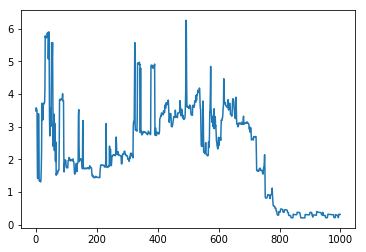

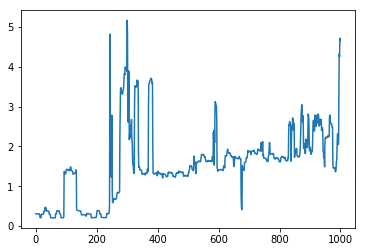

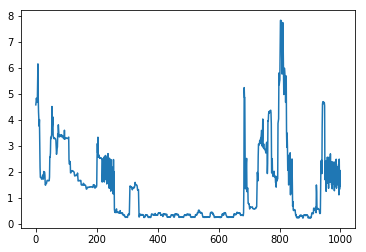

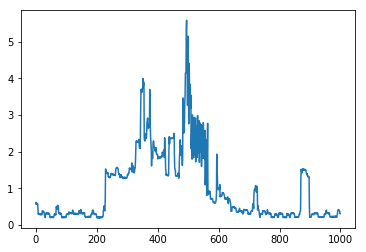

In [25]:
rang = 1000
for i in range(4):

    plt.plot(range(1000), data["Global_active_power"][rang:rang + 1000])
    rang += 1000
    plt.show()

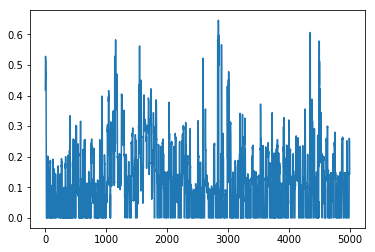

In [26]:

plt.plot(range(rang), data["Global_reactive_power"][:rang])
plt.show()

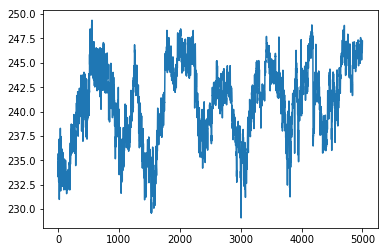

In [27]:

plt.plot(range(rang), data["Voltage"][:rang])
plt.show()

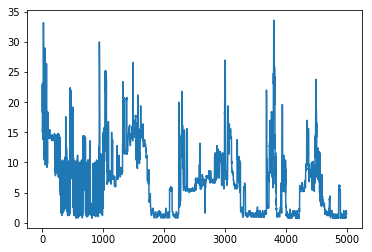

In [28]:

plt.plot(range(rang), data["Global_intensity"][:rang])
plt.show()

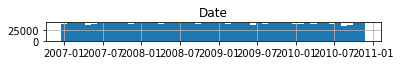

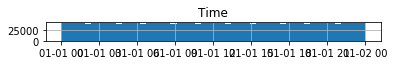

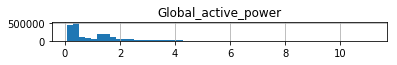

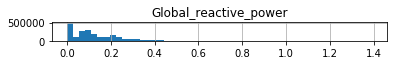

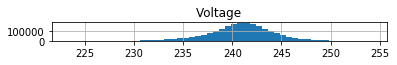

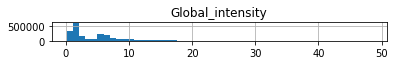

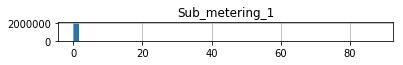

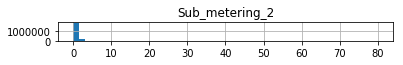

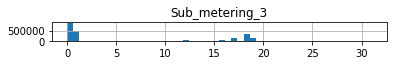

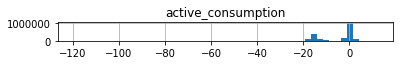

In [29]:

# Obviously date and time are useless
# Voltage wonderful gaussian
# Global variable really concentrated on low value
# Seems bimodal 
for sub, ind in enumerate(data.columns):

    plt.subplot(data.shape[1], 1, sub + 1)
#    plt.hist(data[ind], label = ind, bins = 100)
    data[ind].hist(bins = 50)
    plt.title(ind)
    plt.show()

### Observe data per year, to see if its interesting to investigate 

In [30]:
begin_year = 2007
start_date = pandas.to_datetime("1-1-" + str(begin_year))
end_date = pandas.to_datetime("1-1-" + str(begin_year + 1))

start_date, end_date

(Timestamp('2007-01-01 00:00:00'), Timestamp('2008-01-01 00:00:00'))

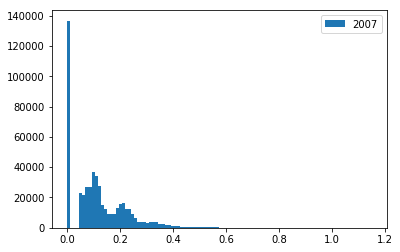

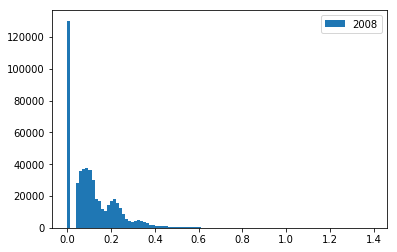

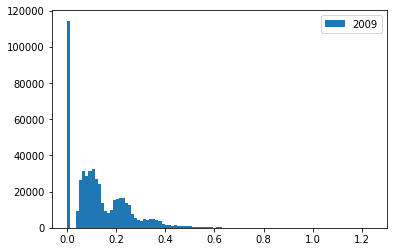

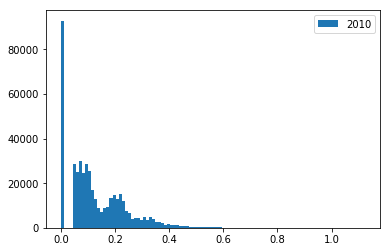

In [31]:
for year in range(2007, 2011):
    start_date = pandas.to_datetime("1-1-" + str(year))
    end_date = pandas.to_datetime("1-1-" + str(year + 1))
    plt.hist(data[(data["Date"] < end_date) & (data["Date"] > start_date)]["Global_reactive_power"],  bins = 100, label = str(year))
    plt.legend()
    plt.show()

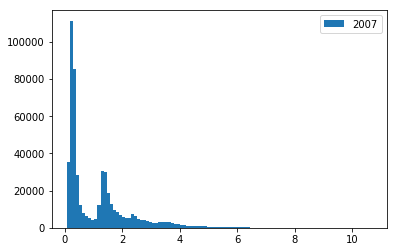

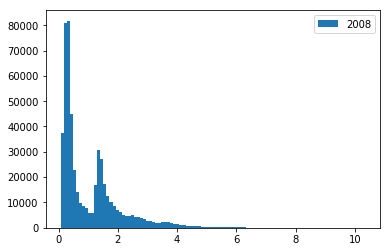

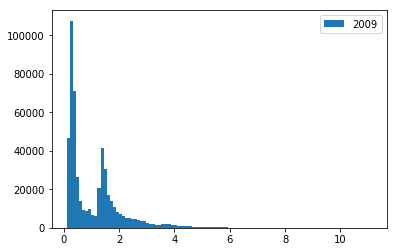

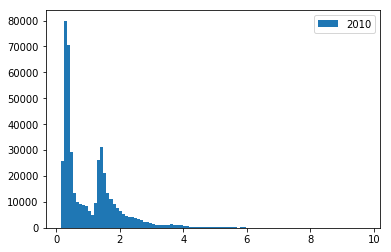

In [32]:
for year in range(2007, 2011):
    start_date = pandas.to_datetime("1-1-" + str(year))
    end_date = pandas.to_datetime("1-1-" + str(year + 1))
    plt.hist(data[(data["Date"] < end_date) & (data["Date"] > start_date)]["Global_active_power"], label = str(year), bins = 100)
    plt.legend()
    plt.show()

# Per month ? 

Month :  1
Start and end  2008-01-01 00:00:00 2008-01-28 00:00:00


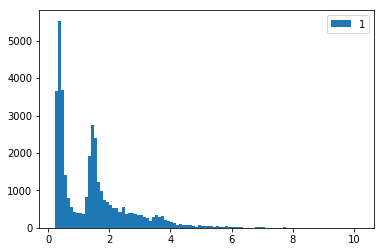

Month :  2
Start and end  2008-02-01 00:00:00 2008-02-28 00:00:00


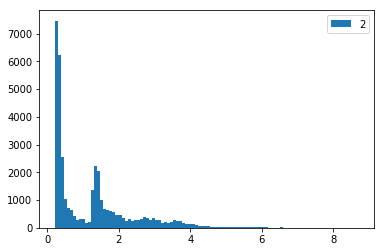

Month :  3
Start and end  2008-03-01 00:00:00 2008-03-28 00:00:00


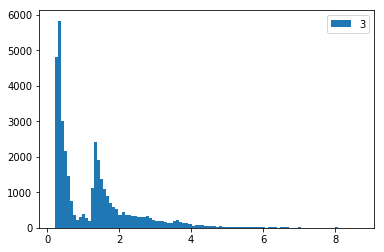

Month :  4
Start and end  2008-04-01 00:00:00 2008-04-28 00:00:00


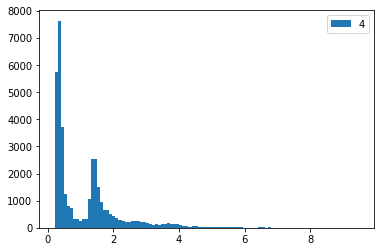

Month :  5
Start and end  2008-05-01 00:00:00 2008-05-28 00:00:00


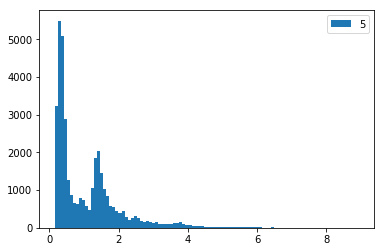

Month :  6
Start and end  2008-06-01 00:00:00 2008-06-28 00:00:00


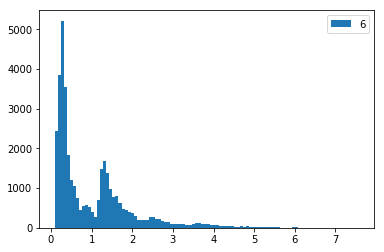

Month :  7
Start and end  2008-07-01 00:00:00 2008-07-28 00:00:00


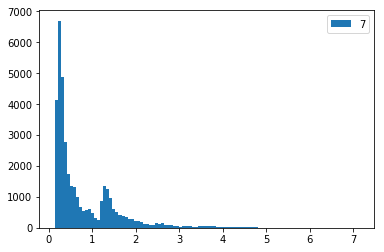

Month :  8
Start and end  2008-08-01 00:00:00 2008-08-28 00:00:00


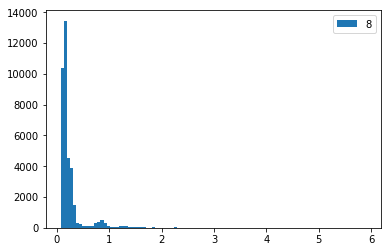

Month :  9
Start and end  2008-09-01 00:00:00 2008-09-28 00:00:00


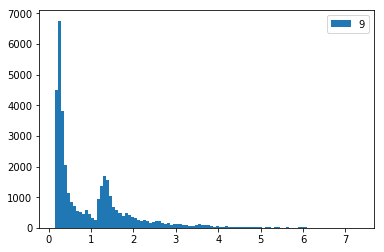

Month :  10
Start and end  2008-10-01 00:00:00 2008-10-28 00:00:00


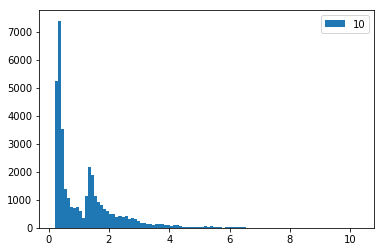

Month :  11
Start and end  2008-11-01 00:00:00 2008-11-28 00:00:00


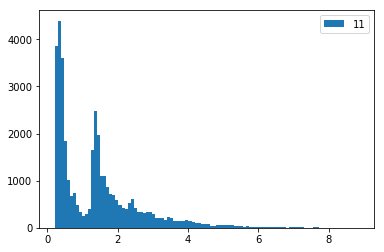

Month :  12
Start and end  2008-12-01 00:00:00 2008-12-28 00:00:00


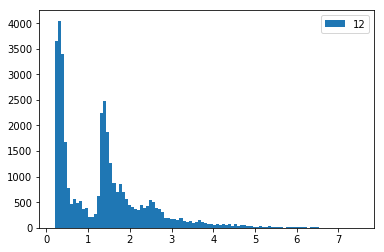

In [33]:
for month in range(1, 13):
    print("Month : ",month)
    start_date = pandas.to_datetime(str(month) + "-1" + "-2008")
    end_date = pandas.to_datetime(str(month) + "-28" + "-2008")
    print("Start and end ", start_date, end_date)
    plt.hist(data[(data["Date"] < end_date) & (data["Date"] > start_date)]["Global_active_power"], label = str(month), bins = 100)
    plt.legend()
    plt.show()

Month :  1
Start and end  2008-01-01 00:00:00 2008-01-28 00:00:00


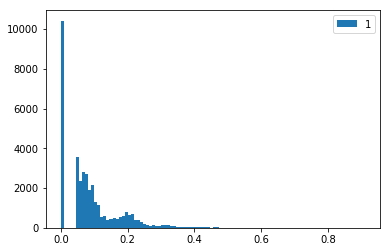

Month :  2
Start and end  2008-02-01 00:00:00 2008-02-28 00:00:00


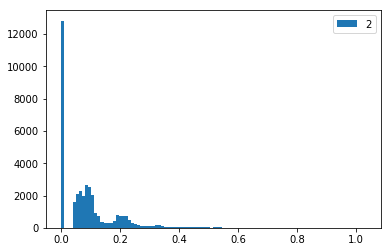

Month :  3
Start and end  2008-03-01 00:00:00 2008-03-28 00:00:00


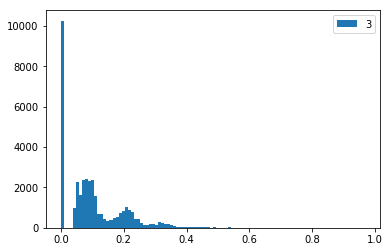

Month :  4
Start and end  2008-04-01 00:00:00 2008-04-28 00:00:00


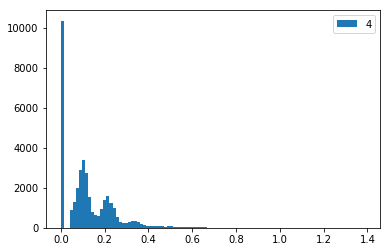

Month :  5
Start and end  2008-05-01 00:00:00 2008-05-28 00:00:00


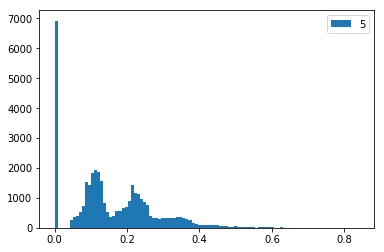

Month :  6
Start and end  2008-06-01 00:00:00 2008-06-28 00:00:00


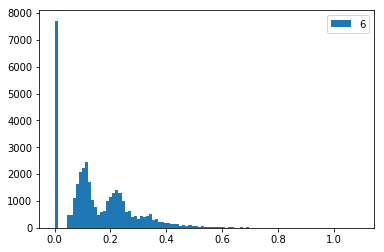

Month :  7
Start and end  2008-07-01 00:00:00 2008-07-28 00:00:00


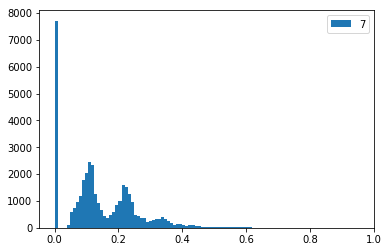

Month :  8
Start and end  2008-08-01 00:00:00 2008-08-28 00:00:00


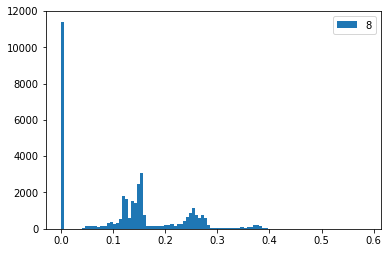

Month :  9
Start and end  2008-09-01 00:00:00 2008-09-28 00:00:00


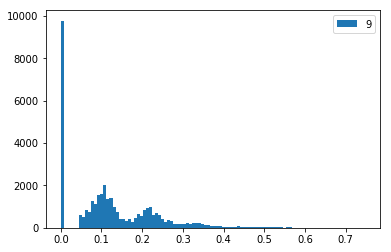

Month :  10
Start and end  2008-10-01 00:00:00 2008-10-28 00:00:00


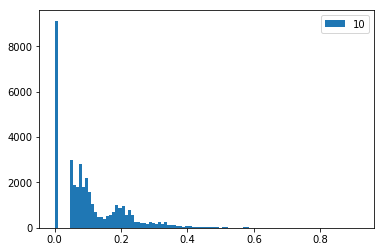

Month :  11
Start and end  2008-11-01 00:00:00 2008-11-28 00:00:00


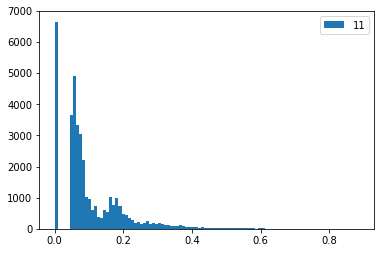

Month :  12
Start and end  2008-12-01 00:00:00 2008-12-28 00:00:00


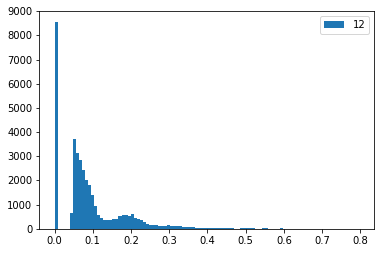

In [34]:
for month in range(1, 13):
    print("Month : ",month)
    start_date = pandas.to_datetime(str(month) + "-1" + "-2008")
    end_date = pandas.to_datetime(str(month) + "-28" + "-2008")
    print("Start and end ", start_date, end_date)
    plt.hist(data[(data["Date"] < end_date) & (data["Date"] > start_date)]["Global_reactive_power"], label = str(month), bins = 100)
    plt.legend()
    plt.show()

Month :  1
Start and end  2008-01-01 00:00:00 2008-01-28 00:00:00


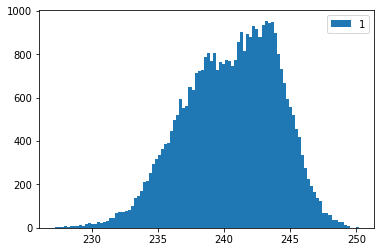

Month :  2
Start and end  2008-02-01 00:00:00 2008-02-28 00:00:00


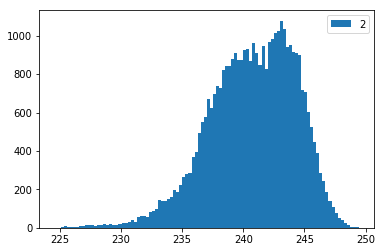

Month :  3
Start and end  2008-03-01 00:00:00 2008-03-28 00:00:00


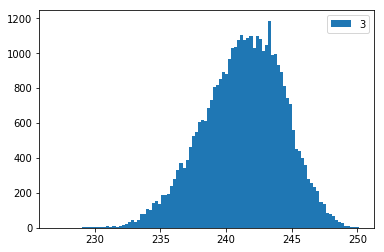

Month :  4
Start and end  2008-04-01 00:00:00 2008-04-28 00:00:00


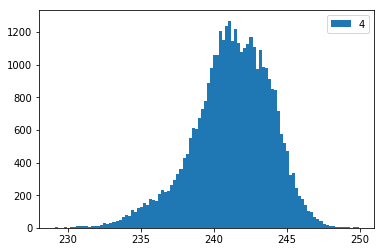

Month :  5
Start and end  2008-05-01 00:00:00 2008-05-28 00:00:00


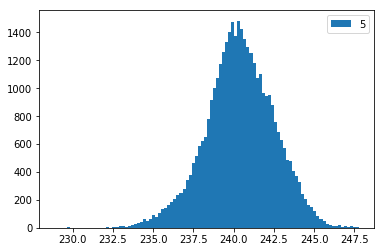

Month :  6
Start and end  2008-06-01 00:00:00 2008-06-28 00:00:00


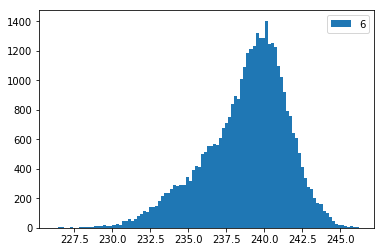

Month :  7
Start and end  2008-07-01 00:00:00 2008-07-28 00:00:00


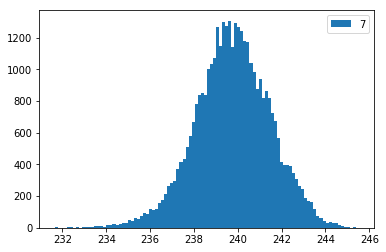

Month :  8
Start and end  2008-08-01 00:00:00 2008-08-28 00:00:00


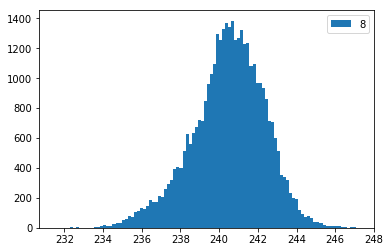

Month :  9
Start and end  2008-09-01 00:00:00 2008-09-28 00:00:00


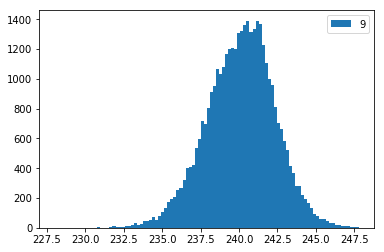

Month :  10
Start and end  2008-10-01 00:00:00 2008-10-28 00:00:00


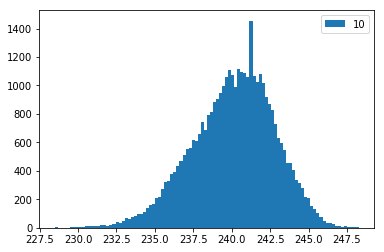

Month :  11
Start and end  2008-11-01 00:00:00 2008-11-28 00:00:00


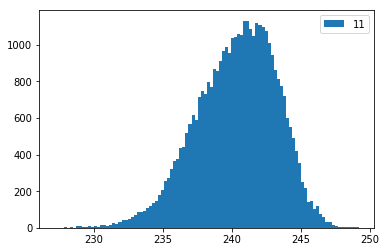

Month :  12
Start and end  2008-12-01 00:00:00 2008-12-28 00:00:00


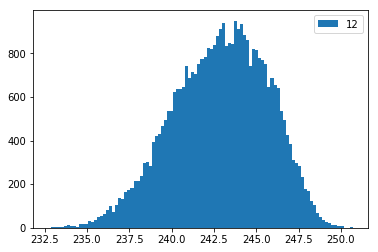

In [35]:
for month in range(1, 13):
    print("Month : ",month)
    start_date = pandas.to_datetime(str(month) + "-1" + "-2008")
    end_date = pandas.to_datetime(str(month) + "-28" + "-2008")
    print("Start and end ", start_date, end_date)
    plt.hist(data[(data["Date"] < end_date) & (data["Date"] > start_date)]["Voltage"], label = str(month), bins = 100)
    plt.legend()
    plt.show()

Month :  1
Start and end  2008-01-01 00:00:00 2008-01-28 00:00:00


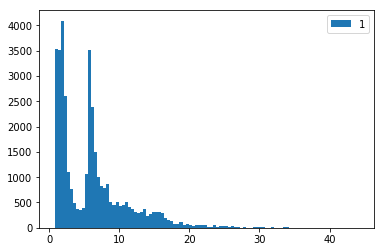

Month :  2
Start and end  2008-02-01 00:00:00 2008-02-28 00:00:00


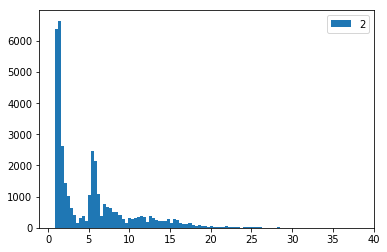

Month :  3
Start and end  2008-03-01 00:00:00 2008-03-28 00:00:00


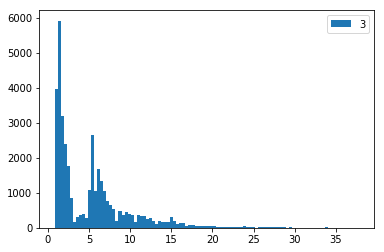

Month :  4
Start and end  2008-04-01 00:00:00 2008-04-28 00:00:00


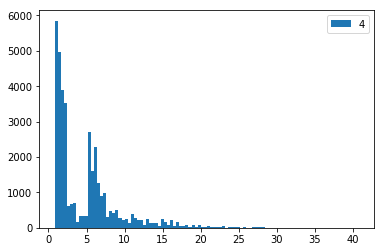

Month :  5
Start and end  2008-05-01 00:00:00 2008-05-28 00:00:00


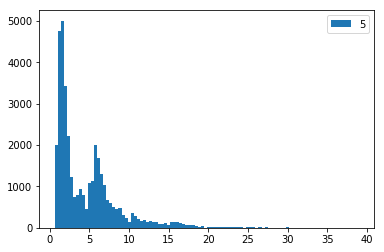

Month :  6
Start and end  2008-06-01 00:00:00 2008-06-28 00:00:00


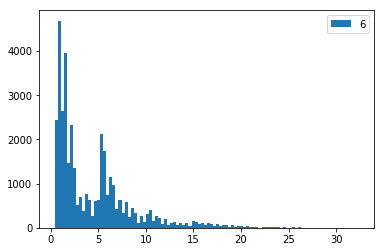

Month :  7
Start and end  2008-07-01 00:00:00 2008-07-28 00:00:00


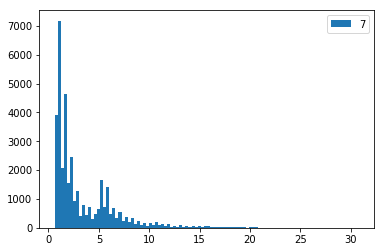

Month :  8
Start and end  2008-08-01 00:00:00 2008-08-28 00:00:00


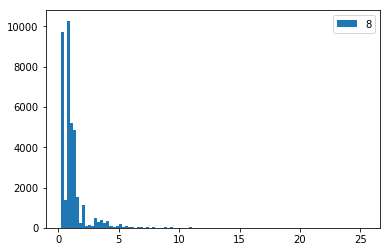

Month :  9
Start and end  2008-09-01 00:00:00 2008-09-28 00:00:00


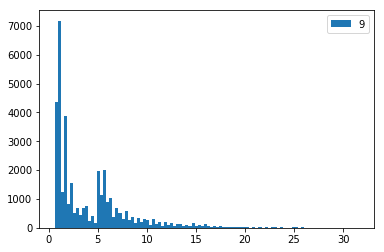

Month :  10
Start and end  2008-10-01 00:00:00 2008-10-28 00:00:00


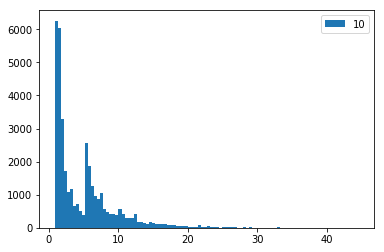

Month :  11
Start and end  2008-11-01 00:00:00 2008-11-28 00:00:00


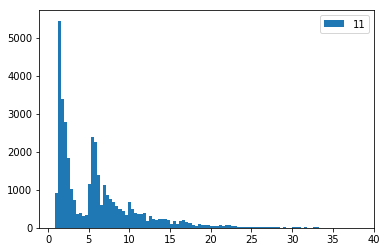

Month :  12
Start and end  2008-12-01 00:00:00 2008-12-28 00:00:00


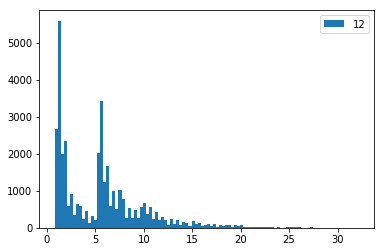

In [36]:
for month in range(1, 13):
    print("Month : ",month)
    start_date = pandas.to_datetime(str(month) + "-1" + "-2008")
    end_date = pandas.to_datetime(str(month) + "-28" + "-2008")
    print("Start and end ", start_date, end_date)
    plt.hist(data[(data["Date"] < end_date) & (data["Date"] > start_date)]["Global_intensity"], label = str(month), bins = 100)
    plt.legend()
    plt.show()

Month :  1
Start and end  2008-01-01 00:00:00 2008-01-28 00:00:00


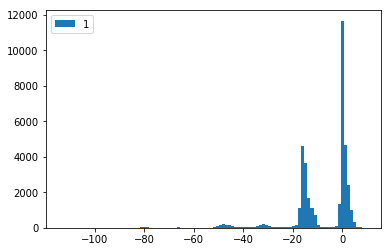

Month :  2
Start and end  2008-02-01 00:00:00 2008-02-28 00:00:00


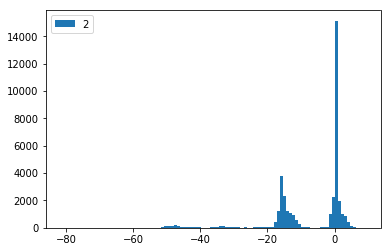

Month :  3
Start and end  2008-03-01 00:00:00 2008-03-28 00:00:00


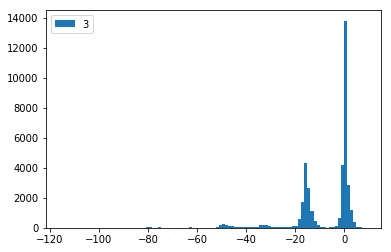

Month :  4
Start and end  2008-04-01 00:00:00 2008-04-28 00:00:00


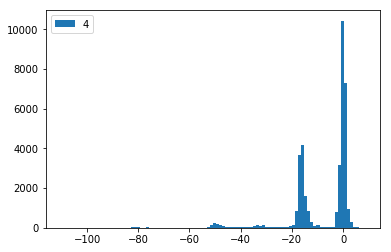

Month :  5
Start and end  2008-05-01 00:00:00 2008-05-28 00:00:00


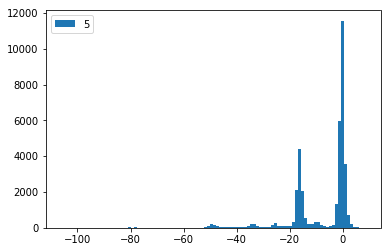

Month :  6
Start and end  2008-06-01 00:00:00 2008-06-28 00:00:00


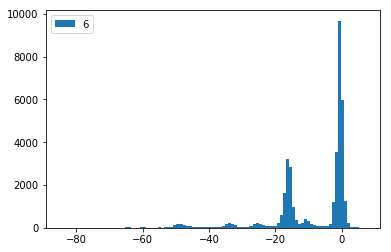

Month :  7
Start and end  2008-07-01 00:00:00 2008-07-28 00:00:00


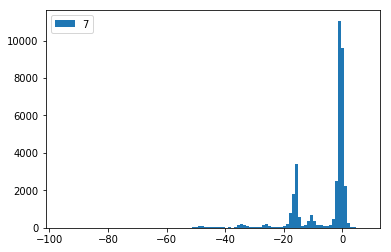

Month :  8
Start and end  2008-08-01 00:00:00 2008-08-28 00:00:00


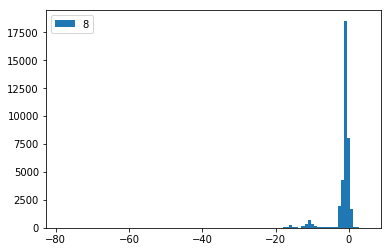

Month :  9
Start and end  2008-09-01 00:00:00 2008-09-28 00:00:00


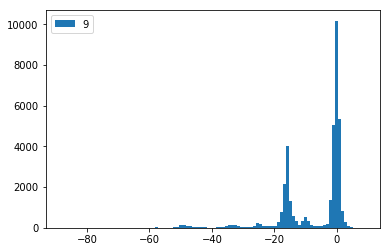

Month :  10
Start and end  2008-10-01 00:00:00 2008-10-28 00:00:00


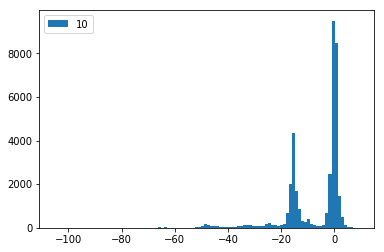

Month :  11
Start and end  2008-11-01 00:00:00 2008-11-28 00:00:00


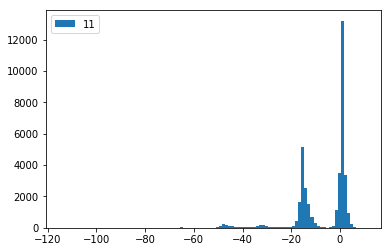

Month :  12
Start and end  2008-12-01 00:00:00 2008-12-28 00:00:00


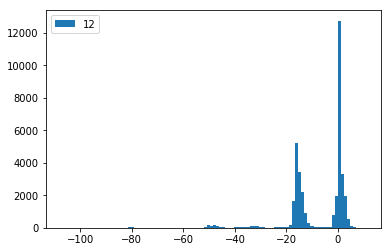

In [37]:
for month in range(1, 13):
    print("Month : ",month)
    start_date = pandas.to_datetime(str(month) + "-1" + "-2008")
    end_date = pandas.to_datetime(str(month) + "-28" + "-2008")
    print("Start and end ", start_date, end_date)
    plt.hist(data[(data["Date"] < end_date) & (data["Date"] > start_date)]["active_consumption"], label = str(month), bins = 100)
    plt.legend()
    plt.show()

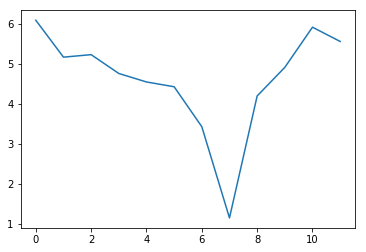

In [38]:
cumul = []
for month in range(1, 13):
    start_date = pandas.to_datetime(str(month) + "-1" + "-2008")
    end_date = pandas.to_datetime(str(month) + "-28" + "-2008")
    cumul.append(np.mean(data[(data["Date"] < end_date) & (data["Date"] > start_date)]["Global_intensity"]))

plt.plot(cumul)
plt.show()

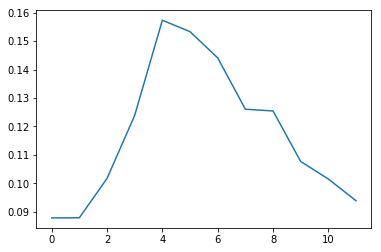

In [39]:
cumul_active = []
for month in range(1, 13):
    start_date = pandas.to_datetime(str(month) + "-1" + "-2008")
    end_date = pandas.to_datetime(str(month) + "-28" + "-2008")
    cumul_active.append(np.mean(data[(data["Date"] < end_date) & (data["Date"] > start_date)]["Global_reactive_power"]))

plt.plot(cumul_active)
plt.show()

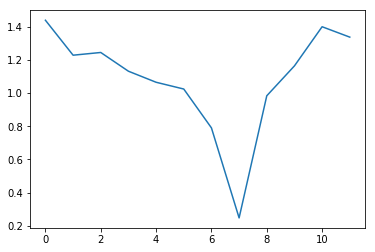

In [40]:
cumul_reactiv = []
for month in range(1, 13):
    start_date = pandas.to_datetime(str(month) + "-1" + "-2008")
    end_date = pandas.to_datetime(str(month) + "-28" + "-2008")
    cumul_reactiv.append(np.mean(data[(data["Date"] < end_date) & (data["Date"] > start_date)]["Global_active_power"]))

plt.plot(cumul_reactiv)
plt.show()

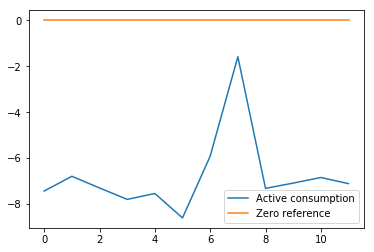

In [41]:
cumul_active_consumption = []
for month in range(1, 13):
    start_date = pandas.to_datetime(str(month) + "-1" + "-2008")
    end_date = pandas.to_datetime(str(month) + "-28" + "-2008")
    cumul_active_consumption.append(np.mean(data[(data["Date"] < end_date) & (data["Date"] > start_date)]["active_consumption"]))

plt.plot(cumul_active_consumption, label = "Active consumption")
plt.plot(np.zeros(len(cumul_active_consumption)), label ="Zero reference")
plt.legend()
plt.show()

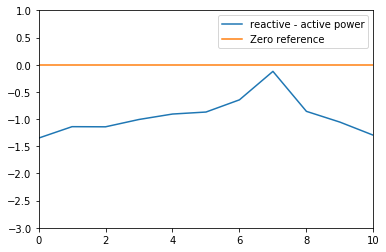

In [42]:
plt.plot(np.array(cumul_active) - np.array(cumul_reactiv),  label = "reactive - active power")
plt.plot(np.zeros(len(cumul_active)), label ="Zero reference")
plt.legend()
plt.axis([0, 10, -3, 1])
plt.show()

# What do we have now 

We still haven't made prediction about the data.

Yet we can already observe some patterns such as relation between active and reactive power variation.

* "Drop" period for both those variables
* Bimodal repartition of the Global informations
* Voltage is a gaussian
* One house's information

So ... the only thing we can analyze with only one house is ... predict its next consumption (hourly, daily...)

What could be our approach
* Normalize SOME data
* Regression maybe?
* LSTM, time series like dataset seems ok for an lstm approach, especially with that much data

# First approach : 
Regression without work on data, to have a baseline
# Problematic :
Let's imagine this is an EDF's problem, EDF produces more electricity than required and want to optimizes its cost, let's predict the Global_X of this client thanks to prior informations

In [43]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.5)

In [44]:
# Split Train / test / label
train_data_X = train
train_data_X = train_data_X.drop(["Global_active_power", "Date", "Time"], axis = 1) # Suppress label, ofc
train_data_Y = train["Global_active_power"] # Global_active_power seems the most important feature, if I understood clearly the definitions
# Lets make it the label we want to predict

test_data_X = test
test_data_X = test_data_X.drop(["Global_active_power", "Date", "Time"], axis = 1) # Suppress label, ofc
test_data_Y = test["Global_active_power"] # Global_active_power seems the most important feature, if I understood clearly the definitions
print(train_data_X.shape, test_data_X.shape, data.shape)

(1024640, 7) (1024640, 7) (2049280, 10)


In [45]:
train_data_X = np.array(train_data_X).reshape((train_data_X.shape[0], 1, train_data_X.shape[1])) # yes, there is a better way but I have a blackout atm
test_data_X = np.array(test_data_X).reshape((test_data_X.shape[0], 1, test_data_X.shape[1])) # yes, there is a better way but I have a blackout atm

In [46]:
train_data_X.shape, test_data_X.shape

((1024640, 1, 7), (1024640, 1, 7))

# Lets begin with an lstm

In [47]:
import keras
from keras.layers import LSTM, Dropout, Dense

In [48]:
layer_1_size = 128
epoch = 3 # Increase it for better result, but on my weak laptop ... 
# Well, tbh, I could modify the data from minutes/hours to hours or day mean 
# We would have significantly less data
# But, there is tons of improvment possible with this subject and I wanted to show you a POC 
# and not a perfect and over optimized solutions, as it was not the purpose here.

batch = 1024 

model = keras.Sequential()
model.add(LSTM(layer_1_size, input_shape = (train_data_X.shape[1], train_data_X.shape[2])))
# Dropout problem on some python distribution, so for a "all in one" notebook I deleted it
# but if you want to improve, a simple dropout of 0.2 or 0.3 should be fine 
# model.add(Dropout(0.2))
model.add(Dense(1, activation = "linear"))
model.compile(loss = "mse", optimizer = "Adam")

history = model.fit(train_data_X, train_data_Y, epochs = epoch, batch_size = batch,\
        validation_data = (test_data_X, test_data_Y), verbose = 1)

Train on 1024640 samples, validate on 1024640 samples
Epoch 1/3
1024640/1024640 [==============================] - 7s 7us/step - loss: 0.0935 - val_loss: 0.0066
Epoch 2/3
1024640/1024640 [==============================] - 5s 4us/step - loss: 0.0046 - val_loss: 0.0035
Epoch 3/3
1024640/1024640 [==============================] - 4s 4us/step - loss: 0.0030 - val_loss: 0.0026


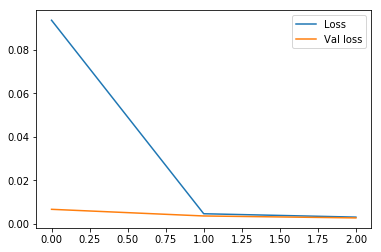

In [49]:
plt.plot(history.history['loss'], label = "Loss")
plt.plot(history.history['val_loss'], label = "Val loss")
plt.legend()
plt.show()


In [50]:
import sklearn
pred = model.predict(test_data_X)
test_data_Y = np.array(test_data_Y)

rmse = np.sqrt(sklearn.metrics.mean_squared_error(test_data_Y, pred))
print('rmse : %.3f' % rmse)

rmse : 0.051


# Quite a good result to begin with.
Let's compare to a simple baseline, too good to be true

# For baseline : Regression

In [102]:
# Split Train / test / label
train_data_X = train
train_data_X = train_data_X.drop(["Global_active_power", "Date", "Time"], axis = 1) # Suppress label, ofc
train_data_Y = train["Global_active_power"] # Global_active_power seems the most important feature, if I understood clearly the definitions
# Lets make it the label we want to predict

test_data_X = test
test_data_X = test_data_X.drop(["Global_active_power", "Date", "Time"], axis = 1) # Suppress label, ofc
test_data_Y = test["Global_active_power"] # Global_active_power seems the most important feature, if I understood clearly the definitions


In [52]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression().fit(train_data_X, train_data_Y)

In [53]:
clf.score(test_data_X, test_data_Y) # Highly not unexpected tbh
# It is actually extremely likely that some variable are correlated with those coeff

1.0

In [54]:
clf.coef_

array([-2.26941117e-15,  8.74300632e-16,  5.68989300e-16,  6.00000000e-01,
        6.00000000e-01,  6.00000000e-01,  6.00000000e-01])

# But wait, there is a problem ! 
Isn't it a cheat to use data the model doesn't know at time T, how can we use data at T+2 to predict a data at T
Our prediction have to be time dependant.
So, yes, probably we can 'reconstruct' data thanks to this strategy, but we don't answer the problematic

And, well, we haven't normalized yet also

In [55]:
start_date = pandas.to_datetime(str(month) + "-1" + "-2008")

In [56]:
# Predict data 1 day later 
# can be modified for hour or year also
def predict_at_t(dataset, last_timestamp):
    timestamp = last_timestamp
    # Extract all "known" data at last_timestamp
    pre_timestamp_data = dataset[dataset["Date"] <= last_timestamp]
    train_data_Y = pre_timestamp_data["Global_active_power"]
    # Theoric label .... BUT if we want to predict with "one day" later, we have to shift those value by
    # 60 * 24 (dataset in minutes)
    nb_minutes_per_day = 60 * 24
    # Those, for data_X[0] corresponds label[1440]
    train_data_Y = train_data_Y[nb_minutes_per_day:]
    train_data_X = pre_timestamp_data.drop(["Global_active_power", "Date", "Time"], axis = 1) 
    # BUUUUUT we also "lose" information about the last 1 day of our data, so we have to destroy the last day of informations 
    # as we don't have its future
    train_data_X = train_data_X[:-nb_minutes_per_day]
    assert train_data_X.shape[0] == train_data_Y.shape[0]

    # now we can train
    clf = LinearRegression().fit(train_data_X, train_data_Y)
    # Now we can observe the prediction of our model
    delta = datetime.timedelta(days=1)
    timestamp += delta
    informations = dataset[dataset["Date"] == timestamp][:1]
    ref_value = informations["Global_active_power"].values[0]
    # DIRTY, TODO : Merge Date and Time. Extract 24 hour later value
    informations = informations.drop(["Date", "Time", "Global_active_power"], axis = 1)
    prediction = clf.predict(informations)
    print("Delta : ", abs(ref_value - prediction))

    
    
        
            

In [57]:
predict_at_t(data, start_date) # With a mean at 1, not that good anymore

Delta :  [0.43504506]


In [58]:
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,active_consumption
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00,-7.059532e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00,1.140847e+01
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-1.198200e+02
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.512000e+01
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-6.466667e-01
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,3.866667e-01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,1.221667e+01


In [59]:
# let's experiment for every year
for year in range(2007, 2011):
    start_date = pandas.to_datetime("1-1-" + str(year))
    predict_at_t(data, start_date) # With a mean at 1, not that good anymore

Delta :  [1.69274123]
Delta :  [0.50874772]
Delta :  [4.33850504]
Delta :  [0.29861366]


In [142]:

def predict_at_t_lstm(dataset, last_timestamp, batch_s = 64, epoch_s = 20):
    
   
    timestamp = last_timestamp
    # Extract all "known" data at last_timestamp
    pre_timestamp_data = dataset[dataset["Date"] <= last_timestamp]
    train_data_Y = pre_timestamp_data["Global_active_power"]
    # Theoric label .... BUT if we want to predict with "one day" later, we have to shift those value by
    # 60 * 24 (dataset in minutes)
    nb_minutes_per_day = 60 * 24
    # Those, for data_X[0] corresponds label[1440]
    train_data_Y = train_data_Y[nb_minutes_per_day:]
    train_data_X = pre_timestamp_data.drop(["Global_active_power", "Date", "Time"], axis = 1) 
    # BUUUUUT we also "lose" information about the last 1 day of our data, so we have to destroy the last day of informations 
    # as we don't have its future
    train_data_X = train_data_X[:-nb_minutes_per_day]
    assert train_data_X.shape[0] == train_data_Y.shape[0]
    train_data_X = np.array(train_data_X).reshape((train_data_X.shape[0], 1, train_data_X.shape[1]))
    # now we can train
    layer_1_size = 128
    epoch = epoch_s
    batch = batch_s
    model = keras.Sequential()
    model.add(LSTM(layer_1_size, input_shape = (train_data_X.shape[1], train_data_X.shape[2])))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation = "linear"))
    model.compile(loss = "mse", optimizer = "Adam")

    history = model.fit(train_data_X, train_data_Y, epochs = epoch, batch_size = batch, shuffle = False, verbose = 2)

    # Now we can observe the prediction of our model
    delta = datetime.timedelta(days=1)
    timestamp += delta
    informations = dataset[dataset["Date"] == timestamp][:1]
    print("Ref value shape ", informations["Global_active_power"])
    ref_value = informations["Global_active_power"].values[0]
    # DIRTY, TODO : Merge Date and Time. Extract 24 hour later value
    informations = informations.drop(["Date", "Time", "Global_active_power"], axis = 1)
    informations = np.array(informations).reshape((informations.shape[0], 1, informations.shape[1]))
    prediction = model.predict(informations)
    print("Delta : ", abs(ref_value - prediction))
    return history, model
    
    
        


Epoch 1/20
21992/21992 [==============================] - 3s 125us/step - loss: 2.2964
Epoch 2/20
21992/21992 [==============================] - 1s 51us/step - loss: 2.1794
Epoch 3/20
21992/21992 [==============================] - 1s 50us/step - loss: 2.1595
Epoch 4/20
21992/21992 [==============================] - 1s 51us/step - loss: 2.1450
Epoch 5/20
21992/21992 [==============================] - 1s 51us/step - loss: 2.1090
Epoch 6/20
21992/21992 [==============================] - 1s 51us/step - loss: 2.1147
Epoch 7/20
21992/21992 [==============================] - 1s 52us/step - loss: 2.1205
Epoch 8/20
21992/21992 [==============================] - 1s 52us/step - loss: 2.1067
Epoch 9/20
21992/21992 [==============================] - 1s 51us/step - loss: 2.0979
Epoch 10/20
21992/21992 [==============================] - 1s 51us/step - loss: 2.1069
Epoch 11/20
21992/21992 [==============================] - 1s 50us/step - loss: 2.1005
Epoch 12/20
21992/21992 [==========================

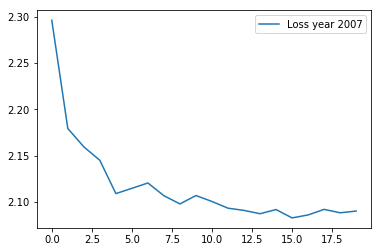

In [83]:
# let's experiment for every year
for year in range(2007, 2008):
    start_date = pandas.to_datetime("1-1-" + str(year))
    history, model = predict_at_t_lstm(data, start_date)
    plt.plot(history.history['loss'], label = "Loss year " + str(year))
    plt.legend()
    plt.show()


In [ ]:
data.columns

# Are my columns correlated ? 

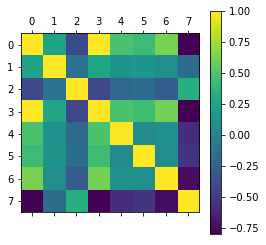

In [62]:
plt.matshow(data.corr()) # Obviously yes
plt.colorbar()
plt.show()
# Global active and intensity are correlated 
# Voltage seems ok
# Active consumption is obviously correlated to the others as it is defined by most of them
# A lot of correlation in this dataset


# After Normalization

In [114]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(0, 1))
data_normalized = data.copy()
data_normalized[data.columns[2:]] = scaler.fit_transform(data[data.columns[2:]])
pandas.DataFrame(data_normalized).head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,active_consumption
0,2006-12-16,1900-01-01 17:24:00,0.374796,0.300719,0.376090,0.377593,0.0,0.0125,0.548387,0.824367
1,2006-12-16,1900-01-01 17:25:00,0.478363,0.313669,0.336995,0.473029,0.0,0.0125,0.516129,0.846381
2,2006-12-16,1900-01-01 17:26:00,0.479631,0.358273,0.326010,0.473029,0.0,0.0250,0.548387,0.831410
3,2006-12-16,1900-01-01 17:27:00,0.480898,0.361151,0.340549,0.473029,0.0,0.0125,0.548387,0.839161
4,2006-12-16,1900-01-01 17:28:00,0.325005,0.379856,0.403231,0.323651,0.0,0.0125,0.548387,0.817424


In [117]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_normalized, test_size = 0.5)

# Split Train / test / label
train_data_X = train
train_data_X = train_data_X.drop(["Date", "Time"], axis = 1) 
train_data_Y = train["Global_active_power"] # Global_active_power seems the most important feature, if I understood clearly the definitions
# Lets make it the label we want to predict

test_data_X = test
test_data_X = test_data_X.drop(["Date", "Time"], axis = 1)
test_data_Y = test["Global_active_power"] # Global_active_power seems the most important feature, if I understood clearly the definitions
print(train_data_X.shape, test_data_X.shape, data.shape)

(1024640, 8) (1024640, 8) (2049280, 10)


Epoch 1/30
 - 4s - loss: 0.0192
Epoch 2/30
 - 1s - loss: 0.0176
Epoch 3/30
 - 1s - loss: 0.0171
Epoch 4/30
 - 1s - loss: 0.0169
Epoch 5/30
 - 1s - loss: 0.0168
Epoch 6/30
 - 1s - loss: 0.0167
Epoch 7/30
 - 1s - loss: 0.0166
Epoch 8/30
 - 1s - loss: 0.0165
Epoch 9/30
 - 1s - loss: 0.0164
Epoch 10/30
 - 1s - loss: 0.0163
Epoch 11/30
 - 1s - loss: 0.0162
Epoch 12/30
 - 1s - loss: 0.0162
Epoch 13/30
 - 1s - loss: 0.0161
Epoch 14/30
 - 1s - loss: 0.0161
Epoch 15/30
 - 1s - loss: 0.0161
Epoch 16/30
 - 1s - loss: 0.0160
Epoch 17/30
 - 1s - loss: 0.0160
Epoch 18/30
 - 1s - loss: 0.0160
Epoch 19/30
 - 1s - loss: 0.0160
Epoch 20/30
 - 1s - loss: 0.0160
Epoch 21/30
 - 1s - loss: 0.0160
Epoch 22/30
 - 1s - loss: 0.0160
Epoch 23/30
 - 1s - loss: 0.0159
Epoch 24/30
 - 1s - loss: 0.0159
Epoch 25/30
 - 1s - loss: 0.0159
Epoch 26/30
 - 1s - loss: 0.0159
Epoch 27/30
 - 1s - loss: 0.0159
Epoch 28/30
 - 1s - loss: 0.0159
Epoch 29/30
 - 1s - loss: 0.0159
Epoch 30/30
 - 1s - loss: 0.0159
Ref value shape  23

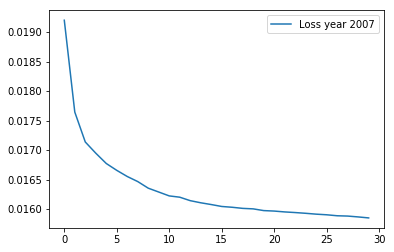

In [143]:
start_date = pandas.to_datetime("1-1-" + str(2007))
history, model = predict_at_t_lstm(data_normalized, start_date, batch_s = 64, epoch_s = 30) 
plt.plot(history.history['loss'], label = "Loss year " + str(2007))
plt.legend()
plt.show()

In [ ]:
import sklearn
normalize_test_x = test_data_X.copy()
normalize_test_x = normalize_test_x.drop(["Global_active_power"], axis = 1)
print("Shape rescaled ", normalize_test_x.shape)
normalize_test_x = np.array(normalize_test_x).reshape((normalize_test_x.shape[0], 1, normalize_test_x.shape[1])) # yes, there is a better way but I have a blackout atm
pred = model.predict(normalize_test_x)
# Recreate data for inverse scaling
normalize_test_x = normalize_test_x.reshape(normalize_test_x.shape[0], normalize_test_x.shape[2])


Shape rescaled  (1024640, 7)


In [ ]:
pandas.DataFrame(normalize_test_x).head()

In [ ]:
normalize_test_x_np = np.array(normalize_test_x)
print(normalize_test_x_np.shape)
normalize_test_x_np[:, 0] = np.array(pred).flatten()
print(normalize_test_x_np.shape)
pred = np.concatenate((pred, normalize_test_x_np), axis = 1)
print("Pred shape ", pred.shape)
test_data_Y = np.array(test_data_Y)
#pred = scaler.inverse_transform(pred)
rmse = np.sqrt(sklearn.metrics.mean_squared_error(test_data_Y, pred[:, 0]))
print('rmse : %.3f' % rmse) # So our error is approximately the mean of the data 

In [ ]:
plt.plot(pred[:, 0][:100], label = "Prediction")
plt.plot(test_data_Y[:100], label = "Reality")
plt.legend()
plt.show()

In [134]:
np.mean(test_data_Y)

0.09195395524880737

In [135]:
test_data_X.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,active_consumption
768443,0.139598,0.058993,0.260097,0.141079,0.011364,0.0125,0.548387,0.783999
1748468,0.053413,0.174101,0.682391,0.058091,0.000000,0.0125,0.032258,0.900735
1851628,0.078580,0.194245,0.499838,0.078838,0.000000,0.0000,0.387097,0.828507
1344934,0.070976,0.192806,0.655574,0.103734,0.000000,0.0000,0.032258,0.910757
1291093,0.005794,0.000000,0.578998,0.008299,0.000000,0.0000,0.032258,0.901669


# The possibitilies 

As it was not the purpose (especially as a POC problem) I didn't implement those features, but, here are some .. possibilities I thought could be explored. 
* Night/Day cycle observing the consommation/hour changing
* Is this a family or a couple or whatever : If they have kids, they will wake up late during the week end for example
* Explore their seasonal habits
* Test model with only 1 day / month delay between samples. The current version is really discutable, using info already seen by the model, or info 2 years from the data available to the model for training, especially with a sampling at random... 
* Transform the dataset from sample/minute to sample/hour or day, significantly faster and might not lose that much info, or can be a tradeoff
